<a href="https://colab.research.google.com/github/nandyy719/MLalgos/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [ ]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [ ]:
df.rename(columns = {'creatinine_phosphokinase' : 'c_phos', 'ejection_fraction': 'e_frac', 'serum_creatinine': 's_create', 'serum_sodium':'s_sod', 'high_blood_pressure': 'hbp'}, inplace=True) #rename columns to make it fit in the plot

In [ ]:
df.shape

(299, 13)

In [ ]:
df.describe()

,age,anaemia,c_phos,diabetes,e_frac,hbp,platelets,s_create,s_sod,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
df.columns

Index(['age', 'anaemia', 'c_phos', 'diabetes', 'e_frac', 'hbp', 'platelets',
       's_create', 's_sod', 'sex', 'smoking', 'time', 'DEATH_EVENT'],
      dtype='object')

In [ ]:
df.nunique()

age             47
anaemia          2
c_phos         208
diabetes         2
e_frac          17
hbp              2
platelets      176
s_create        40
s_sod           27
sex              2
smoking          2
time           148
DEATH_EVENT      2
dtype: int64

In [ ]:
df['age'].unique()

array([75.   , 55.   , 65.   , 50.   , 90.   , 60.   , 80.   , 62.   ,
       45.   , 49.   , 82.   , 87.   , 70.   , 48.   , 68.   , 53.   ,
       95.   , 58.   , 94.   , 85.   , 69.   , 72.   , 51.   , 57.   ,
       42.   , 41.   , 67.   , 79.   , 59.   , 44.   , 63.   , 86.   ,
       66.   , 43.   , 46.   , 61.   , 81.   , 52.   , 64.   , 40.   ,
       60.667, 73.   , 77.   , 78.   , 54.   , 47.   , 56.   ])

In [ ]:
df.isnull().sum()

age            0
anaemia        0
c_phos         0
diabetes       0
e_frac         0
hbp            0
platelets      0
s_create       0
s_sod          0
sex            0
smoking        0
time           0
DEATH_EVENT    0
dtype: int64

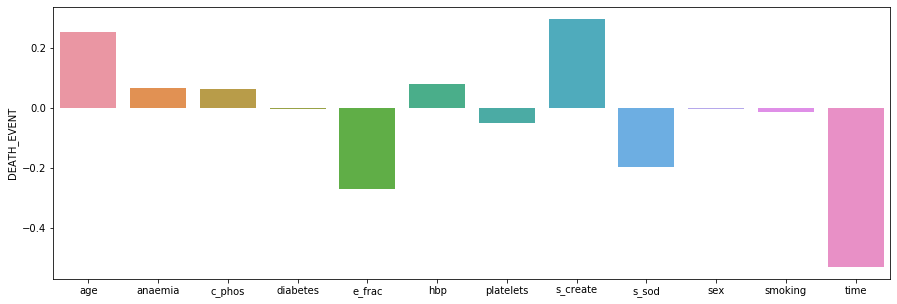

In [ ]:
correlation = df.corr()
plt.figure(figsize=(15, 5))
sns.barplot(x = correlation.columns.drop(['DEATH_EVENT']),y= correlation['DEATH_EVENT'].drop(labels=['DEATH_EVENT']))

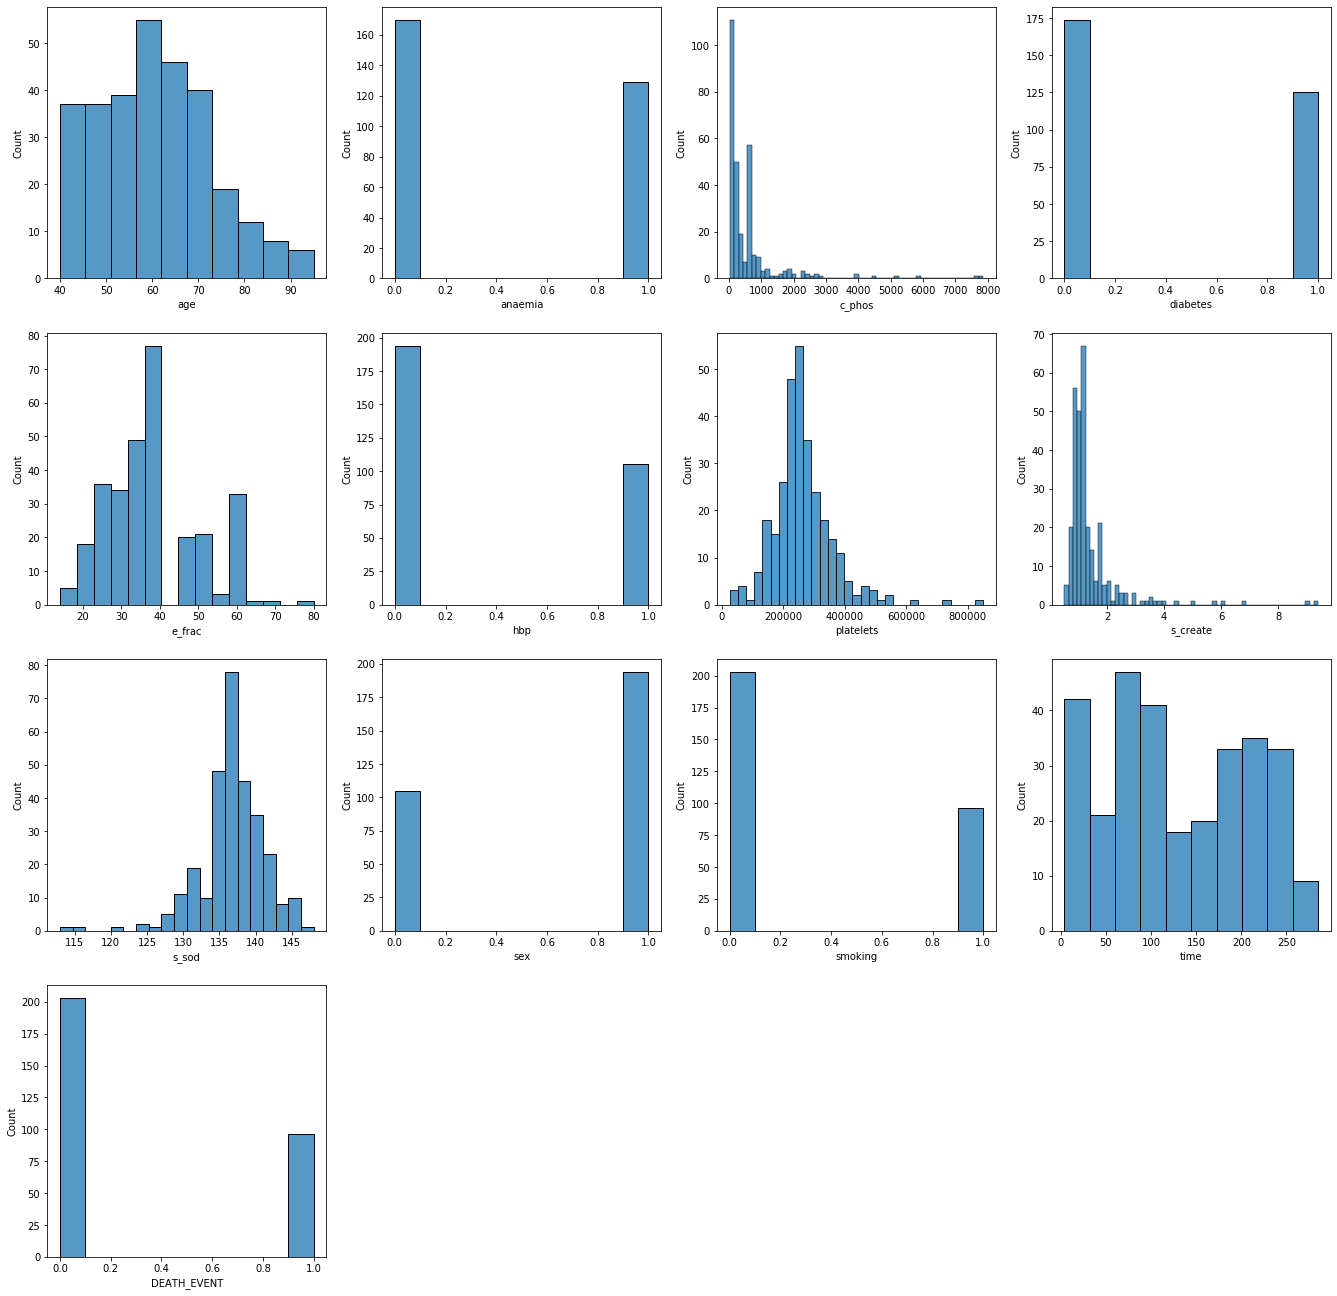

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols = 4, figsize=(23,23))
col_idx = 0
for i in range(4):
    for j in range(4):
        if col_idx >= len(df.columns):
            break
        sns.histplot(data = df, x = df.columns[col_idx], ax=axes[i][j])
        col_idx+=1
for j in range(1, 4):
    fig.delaxes(ax = axes[3][j])

In [ ]:
df.drop(['diabetes', 'sex', 'smoking'], axis = 1, inplace= True)
X = df.loc[:, 'age': 'time'].to_numpy()
y = df[['DEATH_EVENT']].to_numpy()
scale = StandardScaler()
X = scale.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
X_train.shape

(224, 9)

In [ ]:
y_train.shape

(224, 1)

In [ ]:

class KNN:
    def __init__(self, k = 3):
        self.k = k
    def train(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    def __predict(self, x):
        distances = []
        for idx, sample in enumerate(self.X_train):
            dist = np.linalg.norm(sample-x)
            distances.append((idx, dist)) #add both row number and the distance
        distances.sort(key=lambda entry: entry[1]) #sort by distance
        nearest_neighbors = []
        
        for i in range(self.k):
            idx = distances[i][0]
            nearest_neighbors.append(tuple(self.y_train[idx])) #converting to tuple to use max function to find most common element
        mode = max(set(nearest_neighbors), key = nearest_neighbors.count)
        return np.array(mode)
    def predict(self, X):
        preds = []
        for x in X:
            preds.append(self.__predict(x))
        return np.array(preds)
        
        
    
        
        
            
        

In [ ]:
my_clf = KNN(k = 7)
my_clf.train(X_train, y_train)
y_pred = my_clf.predict(X_test)

confusion_matrix(y_test, y_pred)


array([[52,  5],
       [10,  8]], dtype=int64)

In [ ]:
sk_clf = KNeighborsClassifier(n_neighbors = 7)
sk_clf.fit(X_train, y_train)
sk_pred = np.array([sk_clf.predict(x.reshape(1,-1)) for x in X_test])

confusion_matrix(y_test,sk_pred)

c:\users\nandh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


array([[52,  5],
       [10,  8]], dtype=int64)